In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""
test=""
z_diff=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  
%run -i /home/cz136/project/sa/lib/src/corr_func.py  

In [4]:
# z_diff=float(z_diff)

In [5]:
if test=="foreground":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])>=z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
    
elif test=="background":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])<=-z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="":
    members=shapes
else:
    raise TypeError

In [6]:
if vol!="uber":
    members=shapes

In [7]:
if quantile!="":
    i=int(quantile)

In [8]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [9]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [10]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [11]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [12]:
NBINS=10

In [13]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [14]:
len(shapes)

188198

In [15]:
len(members)

188198

In [16]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [17]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

16it [00:00, 157.29it/s]

35it [00:00, 165.30it/s]

54it [00:00, 171.91it/s]

70it [00:00, 166.22it/s]

83it [00:00, 133.48it/s]

104it [00:00, 149.31it/s]

125it [00:00, 162.88it/s]

146it [00:00, 174.35it/s]

168it [00:00, 183.66it/s]

189it [00:01, 190.16it/s]

211it [00:01, 195.78it/s]

232it [00:01, 198.55it/s]

254it [00:01, 202.06it/s]

275it [00:01, 203.84it/s]

296it [00:01, 205.35it/s]

318it [00:01, 206.91it/s]

340it [00:01, 208.11it/s]

361it [00:01, 208.21it/s]

382it [00:01, 208.48it/s]

404it [00:02, 209.13it/s]

425it [00:02, 208.28it/s]

447it [00:02, 209.01it/s]

468it [00:02, 208.92it/s]

490it [00:02, 209.55it/s]

511it [00:02, 209.67it/s]

533it [00:02, 209.59it/s]

554it [00:02, 208.70it/s]

575it [00:02, 208.39it/s]

596it [00:03, 208.52it/s]

617it [00:03, 199.91it/s]

638it [00:03, 201.80it/s]

659it [00:03, 203.55it/s]

680it [00:03, 205.02it/s]

701it [00:03, 206.10it/s]

722it [00:03, 207.16it/s]

744it [00:03, 208.01it/s]

765it [00:03, 208.07it/s]

786it [00:03, 208.49it/s]

808it [00:04, 208.90it/s]

829it [00:04, 208.31it/s]

850it [00:04, 199.51it/s]

871it [00:04, 191.00it/s]

891it [00:04, 191.77it/s]

911it [00:04, 192.00it/s]

931it [00:04, 192.19it/s]

951it [00:04, 192.36it/s]

971it [00:04, 192.56it/s]

991it [00:04, 192.73it/s]

1011it [00:05, 187.27it/s]

1032it [00:05, 192.27it/s]

1053it [00:05, 195.94it/s]

1074it [00:05, 198.40it/s]

1095it [00:05, 200.40it/s]

1116it [00:05, 202.02it/s]

1137it [00:05, 202.62it/s]

1158it [00:05, 203.38it/s]

1179it [00:05, 203.42it/s]

1200it [00:06, 204.07it/s]

1221it [00:06, 204.99it/s]

1242it [00:06, 205.51it/s]

1263it [00:06, 206.54it/s]

1285it [00:06, 207.84it/s]

1307it [00:06, 208.62it/s]

1329it [00:06, 209.28it/s]

1350it [00:06, 209.40it/s]

1372it [00:06, 209.98it/s]

1394it [00:06, 210.67it/s]

1416it [00:07, 210.18it/s]

1438it [00:07, 209.33it/s]

1459it [00:07, 207.70it/s]

1480it [00:07, 203.82it/s]

1501it [00:07, 204.40it/s]

1522it [00:07, 205.36it/s]

1543it [00:07, 206.14it/s]

1564it [00:07, 206.57it/s]

1585it [00:07, 205.95it/s]

1606it [00:07, 205.48it/s]

1627it [00:08, 204.96it/s]

1648it [00:08, 205.76it/s]

1669it [00:08, 199.52it/s]

1689it [00:08, 191.04it/s]

1709it [00:08, 190.67it/s]

1731it [00:08, 196.57it/s]

1752it [00:08, 195.36it/s]

1772it [00:08, 193.35it/s]

1793it [00:08, 196.40it/s]

1814it [00:09, 197.54it/s]

1834it [00:09, 182.30it/s]

1853it [00:09, 176.99it/s]

1871it [00:09, 173.35it/s]

1889it [00:09, 170.65it/s]

1907it [00:09, 168.89it/s]

1924it [00:09, 167.72it/s]

1941it [00:09, 165.99it/s]

1961it [00:09, 173.01it/s]

1981it [00:10, 179.81it/s]

2000it [00:10, 173.38it/s]

2018it [00:10, 171.54it/s]

2036it [00:10, 169.69it/s]

2054it [00:10, 167.53it/s]

2071it [00:10, 167.69it/s]

2089it [00:10, 169.16it/s]

2108it [00:10, 173.98it/s]

2130it [00:10, 183.90it/s]

2151it [00:10, 190.75it/s]

2173it [00:11, 196.35it/s]

2194it [00:11, 197.67it/s]

2215it [00:11, 200.27it/s]

2236it [00:11, 202.26it/s]

2257it [00:11, 204.04it/s]

2278it [00:11, 205.10it/s]

2299it [00:11, 206.04it/s]

2320it [00:11, 206.86it/s]

2341it [00:11, 206.84it/s]

2362it [00:12, 207.01it/s]

2383it [00:12, 206.94it/s]

2404it [00:12, 207.27it/s]

2425it [00:12, 207.17it/s]

2446it [00:12, 206.32it/s]

2467it [00:12, 205.79it/s]

2488it [00:12, 204.60it/s]

2509it [00:12, 205.16it/s]

2530it [00:12, 205.94it/s]

2551it [00:12, 206.12it/s]

2572it [00:13, 205.68it/s]

2593it [00:13, 204.64it/s]

2614it [00:13, 203.80it/s]

2635it [00:13, 204.19it/s]

2656it [00:13, 203.99it/s]

2677it [00:13, 204.68it/s]

2698it [00:13, 203.92it/s]

2719it [00:13, 204.93it/s]

2740it [00:13, 204.52it/s]

2761it [00:13, 204.05it/s]

2782it [00:14, 202.89it/s]

2803it [00:14, 203.26it/s]

2824it [00:14, 202.93it/s]

2845it [00:14, 193.50it/s]

2866it [00:14, 195.66it/s]

2887it [00:14, 197.55it/s]

2908it [00:14, 199.14it/s]

2929it [00:14, 200.68it/s]

2950it [00:14, 201.53it/s]

2971it [00:15, 202.21it/s]

2992it [00:15, 202.25it/s]

3013it [00:15, 202.06it/s]

3034it [00:15, 203.52it/s]

3055it [00:15, 203.48it/s]

3076it [00:15, 203.32it/s]

3097it [00:15, 204.16it/s]

3118it [00:15, 205.15it/s]

3139it [00:15, 205.65it/s]

3160it [00:15, 205.40it/s]

3181it [00:16, 205.67it/s]

3202it [00:16, 204.47it/s]

3223it [00:16, 204.51it/s]

3244it [00:16, 203.66it/s]

3265it [00:16, 204.79it/s]

3286it [00:16, 205.28it/s]

3307it [00:16, 206.05it/s]

3328it [00:16, 206.77it/s]

3349it [00:16, 207.25it/s]

3370it [00:16, 207.18it/s]

3391it [00:17, 207.32it/s]

3412it [00:17, 207.49it/s]

3433it [00:17, 207.30it/s]

3454it [00:17, 207.41it/s]

3475it [00:17, 207.58it/s]

3496it [00:17, 207.68it/s]

3517it [00:17, 207.83it/s]

3538it [00:17, 207.62it/s]

3559it [00:17, 207.65it/s]

3580it [00:17, 207.69it/s]

3601it [00:18, 207.29it/s]

3622it [00:18, 204.94it/s]

3643it [00:18, 206.17it/s]

3665it [00:18, 207.69it/s]

3687it [00:18, 209.19it/s]

3709it [00:18, 209.90it/s]

3730it [00:18, 209.39it/s]

3751it [00:18, 209.30it/s]

3772it [00:18, 209.49it/s]

3794it [00:18, 209.87it/s]

3815it [00:19, 209.39it/s]

3837it [00:19, 209.61it/s]

3859it [00:19, 210.23it/s]

3881it [00:19, 210.01it/s]

3903it [00:19, 209.91it/s]

3925it [00:19, 210.63it/s]

3947it [00:19, 210.47it/s]

3969it [00:19, 210.68it/s]

3991it [00:19, 210.33it/s]

4013it [00:20, 210.37it/s]

4035it [00:20, 210.41it/s]

4057it [00:20, 210.39it/s]

4079it [00:20, 210.21it/s]

4101it [00:20, 210.62it/s]

4123it [00:20, 210.52it/s]

4145it [00:20, 210.45it/s]

4167it [00:20, 210.52it/s]

4189it [00:20, 210.42it/s]

4211it [00:20, 210.49it/s]

4233it [00:21, 210.32it/s]

4255it [00:21, 211.04it/s]

4277it [00:21, 210.83it/s]

4299it [00:21, 211.42it/s]

4321it [00:21, 211.12it/s]

4343it [00:21, 211.29it/s]

4365it [00:21, 210.66it/s]

4387it [00:21, 211.01it/s]

4409it [00:21, 210.44it/s]

4431it [00:22, 210.75it/s]

4453it [00:22, 191.98it/s]

4473it [00:22, 176.90it/s]

4492it [00:22, 172.27it/s]

4510it [00:22, 166.85it/s]

4527it [00:22, 167.27it/s]

4544it [00:22, 167.44it/s]

4561it [00:22, 167.91it/s]

4578it [00:22, 168.22it/s]

4595it [00:23, 166.23it/s]

4613it [00:23, 167.57it/s]

4631it [00:23, 168.46it/s]

4652it [00:23, 177.45it/s]

4673it [00:23, 185.70it/s]

4694it [00:23, 192.20it/s]

4715it [00:23, 196.90it/s]

4736it [00:23, 200.02it/s]

4757it [00:23, 201.55it/s]

4778it [00:23, 202.56it/s]

4799it [00:24, 203.59it/s]

4820it [00:24, 204.54it/s]

4841it [00:24, 203.60it/s]

4862it [00:24, 195.39it/s]

4883it [00:24, 199.25it/s]

4904it [00:24, 200.52it/s]

4925it [00:24, 185.50it/s]

4944it [00:24, 181.83it/s]

4963it [00:24, 179.15it/s]

4982it [00:25, 177.32it/s]

5000it [00:25, 176.29it/s]

5018it [00:25, 175.51it/s]

5038it [00:25, 180.78it/s]

5059it [00:25, 187.98it/s]

5080it [00:25, 193.48it/s]

5102it [00:25, 198.94it/s]

5124it [00:25, 202.73it/s]

5145it [00:25, 189.19it/s]

5165it [00:26, 182.48it/s]

5184it [00:26, 177.91it/s]

5202it [00:26, 174.72it/s]

5220it [00:26, 172.38it/s]

5238it [00:26, 169.30it/s]

5256it [00:26, 169.48it/s]

5277it [00:26, 178.25it/s]

5298it [00:26, 185.37it/s]

5319it [00:26, 190.82it/s]

5340it [00:26, 194.36it/s]

5361it [00:27, 197.45it/s]

5382it [00:27, 199.39it/s]

5403it [00:27, 198.73it/s]

5424it [00:27, 199.64it/s]

5445it [00:27, 199.88it/s]

5466it [00:27, 200.29it/s]

5487it [00:27, 201.13it/s]

5508it [00:27, 200.83it/s]

5529it [00:27, 200.12it/s]

5550it [00:28, 201.19it/s]

5571it [00:28, 200.46it/s]

5592it [00:28, 199.05it/s]

5612it [00:28, 198.97it/s]

5632it [00:28, 197.44it/s]

5652it [00:28, 197.65it/s]

5672it [00:28, 198.21it/s]

5693it [00:28, 199.80it/s]

5714it [00:28, 201.12it/s]

5735it [00:28, 201.97it/s]

5756it [00:29, 188.31it/s]

5776it [00:29, 183.01it/s]

5795it [00:29, 180.29it/s]

5814it [00:29, 178.39it/s]

5832it [00:29, 177.09it/s]

5850it [00:29, 168.19it/s]

5867it [00:29, 167.92it/s]

5884it [00:29, 168.22it/s]

5901it [00:29, 168.12it/s]

5918it [00:30, 164.60it/s]

5935it [00:30, 164.13it/s]

5952it [00:30, 163.76it/s]

5969it [00:30, 163.72it/s]

5990it [00:30, 173.66it/s]

6011it [00:30, 182.26it/s]

6032it [00:30, 187.56it/s]

6053it [00:30, 191.35it/s]

6074it [00:30, 194.35it/s]

6095it [00:30, 197.46it/s]

6116it [00:31, 199.22it/s]

6136it [00:31, 197.45it/s]

6156it [00:31, 197.46it/s]

6177it [00:31, 198.23it/s]

6197it [00:31, 198.26it/s]

6217it [00:31, 198.59it/s]

6237it [00:31, 179.80it/s]

6256it [00:31, 170.13it/s]

6276it [00:31, 177.42it/s]

6295it [00:32, 179.63it/s]

6314it [00:32, 167.73it/s]

6335it [00:32, 176.53it/s]

6354it [00:32, 164.62it/s]

6375it [00:32, 175.17it/s]

6397it [00:32, 184.39it/s]

6418it [00:32, 189.83it/s]

6440it [00:32, 195.86it/s]

6462it [00:32, 200.60it/s]

6483it [00:33, 203.31it/s]

6505it [00:33, 206.61it/s]

6527it [00:33, 208.55it/s]

6549it [00:33, 210.07it/s]

6571it [00:33, 211.05it/s]

6593it [00:33, 208.42it/s]

6614it [00:33, 208.69it/s]

6635it [00:33, 207.67it/s]

6656it [00:33, 207.75it/s]

6677it [00:33, 208.25it/s]

6698it [00:34, 208.31it/s]

6719it [00:34, 208.64it/s]

6740it [00:34, 209.01it/s]

6761it [00:34, 196.47it/s]

6783it [00:34, 201.42it/s]

6805it [00:34, 204.43it/s]

6827it [00:34, 206.90it/s]

6849it [00:34, 209.07it/s]

6871it [00:34, 209.42it/s]

6893it [00:35, 209.80it/s]

6915it [00:35, 210.03it/s]

6937it [00:35, 210.65it/s]

6959it [00:35, 211.26it/s]

6981it [00:35, 212.13it/s]

7003it [00:35, 213.03it/s]

7025it [00:35, 205.05it/s]

7046it [00:35, 192.31it/s]

7066it [00:35, 184.32it/s]

7085it [00:35, 179.32it/s]

7104it [00:36, 175.96it/s]

7122it [00:36, 173.68it/s]

7140it [00:36, 171.89it/s]

7160it [00:36, 177.55it/s]

7181it [00:36, 185.77it/s]

7202it [00:36, 191.63it/s]

7223it [00:36, 195.25it/s]

7243it [00:36, 195.42it/s]

7264it [00:36, 197.71it/s]

7285it [00:37, 199.59it/s]

7306it [00:37, 200.44it/s]

7327it [00:37, 199.96it/s]

7348it [00:37, 201.90it/s]

7369it [00:37, 203.67it/s]

7390it [00:37, 205.09it/s]

7411it [00:37, 205.48it/s]

7432it [00:37, 205.91it/s]

7453it [00:37, 205.62it/s]

7474it [00:37, 205.82it/s]

7495it [00:38, 206.21it/s]

7516it [00:38, 206.49it/s]

7537it [00:38, 206.49it/s]

7558it [00:38, 206.64it/s]

7579it [00:38, 206.23it/s]

7600it [00:38, 206.41it/s]

7621it [00:38, 205.62it/s]

7642it [00:38, 205.24it/s]

7663it [00:38, 198.23it/s]

7684it [00:38, 199.51it/s]

7705it [00:39, 199.76it/s]

7726it [00:39, 192.23it/s]

7747it [00:39, 195.16it/s]

7768it [00:39, 197.15it/s]

7788it [00:39, 190.61it/s]

7809it [00:39, 194.45it/s]

7829it [00:39, 186.84it/s]

7848it [00:39, 182.75it/s]

7867it [00:39, 180.08it/s]

7886it [00:40, 178.03it/s]

7904it [00:40, 162.51it/s]

7921it [00:40, 163.39it/s]

7940it [00:40, 168.42it/s]

7962it [00:40, 179.74it/s]

7984it [00:40, 188.58it/s]

8005it [00:40, 194.38it/s]

8027it [00:40, 199.12it/s]

8049it [00:40, 203.04it/s]

8071it [00:41, 205.29it/s]

8092it [00:41, 199.81it/s]

8114it [00:41, 203.07it/s]

8135it [00:41, 165.69it/s]

8155it [00:41, 173.82it/s]

8176it [00:41, 182.08it/s]

8197it [00:41, 188.62it/s]

8218it [00:41, 192.92it/s]

8238it [00:41, 190.92it/s]

8259it [00:42, 193.79it/s]

8280it [00:42, 196.69it/s]

8301it [00:42, 198.35it/s]

8322it [00:42, 199.94it/s]

8343it [00:42, 200.84it/s]

8364it [00:42, 201.34it/s]

8385it [00:42, 201.96it/s]

8406it [00:42, 202.94it/s]

8427it [00:42, 203.07it/s]

8448it [00:42, 203.38it/s]

8469it [00:43, 198.68it/s]

8490it [00:43, 200.27it/s]

8511it [00:43, 201.84it/s]

8532it [00:43, 202.71it/s]

8553it [00:43, 202.11it/s]

8574it [00:43, 202.41it/s]

8595it [00:43, 198.22it/s]

8616it [00:43, 199.60it/s]

8637it [00:43, 201.30it/s]

8658it [00:44, 200.55it/s]

8679it [00:44, 201.82it/s]

8700it [00:44, 196.80it/s]

8720it [00:44, 193.42it/s]

8740it [00:44, 178.35it/s]

8760it [00:44, 182.47it/s]

8780it [00:44, 186.89it/s]

8800it [00:44, 190.10it/s]

8820it [00:44, 192.71it/s]

8840it [00:45, 194.58it/s]

8860it [00:45, 195.44it/s]

8880it [00:45, 194.73it/s]

8901it [00:45, 197.41it/s]

8922it [00:45, 199.29it/s]

8943it [00:45, 200.30it/s]

8964it [00:45, 200.57it/s]

8985it [00:45, 201.04it/s]

9006it [00:45, 201.61it/s]

9027it [00:45, 199.48it/s]

9048it [00:46, 200.65it/s]

9069it [00:46, 200.79it/s]

9090it [00:46, 200.39it/s]

9111it [00:46, 200.60it/s]

9132it [00:46, 201.15it/s]

9153it [00:46, 200.74it/s]

9174it [00:46, 200.91it/s]

9195it [00:46, 201.89it/s]

9216it [00:46, 202.70it/s]

9237it [00:46, 202.76it/s]

9258it [00:47, 203.43it/s]

9279it [00:47, 203.69it/s]

9300it [00:47, 201.42it/s]

9321it [00:47, 202.04it/s]

9342it [00:47, 190.78it/s]

9362it [00:47, 184.69it/s]

9381it [00:47, 180.27it/s]

9400it [00:47, 177.61it/s]

9418it [00:47, 175.90it/s]

9436it [00:48, 175.03it/s]

9454it [00:48, 175.30it/s]

9476it [00:48, 184.78it/s]

9497it [00:48, 190.94it/s]

9519it [00:48, 196.47it/s]

9541it [00:48, 200.85it/s]

9562it [00:48, 203.33it/s]

9583it [00:48, 204.86it/s]

9604it [00:48, 205.97it/s]

9626it [00:48, 207.41it/s]

9647it [00:49, 206.91it/s]

9669it [00:49, 208.08it/s]

9690it [00:49, 208.11it/s]

9712it [00:49, 208.72it/s]

9733it [00:49, 208.46it/s]

9755it [00:49, 209.56it/s]

9777it [00:49, 209.85it/s]

9798it [00:49, 207.99it/s]

9820it [00:49, 209.37it/s]

9842it [00:50, 209.82it/s]

9864it [00:50, 210.78it/s]

9886it [00:50, 198.81it/s]

9907it [00:50, 200.53it/s]

9928it [00:50, 202.87it/s]

9949it [00:50, 180.78it/s]

9968it [00:50, 178.62it/s]

9987it [00:50, 177.33it/s]

10005it [00:50, 175.26it/s]

10024it [00:51, 179.03it/s]

10045it [00:51, 186.00it/s]

10067it [00:51, 192.70it/s]

10088it [00:51, 197.50it/s]

10110it [00:51, 201.57it/s]

10132it [00:51, 204.73it/s]

10154it [00:51, 207.38it/s]

10176it [00:51, 208.96it/s]

10197it [00:51, 208.95it/s]

10219it [00:51, 209.67it/s]

10241it [00:52, 210.82it/s]

10263it [00:52, 210.86it/s]

10285it [00:52, 211.52it/s]

10307it [00:52, 211.62it/s]

10329it [00:52, 210.66it/s]

10351it [00:52, 211.14it/s]

10373it [00:52, 209.90it/s]

10395it [00:52, 211.05it/s]

10417it [00:52, 210.42it/s]

10439it [00:52, 209.77it/s]

10460it [00:53, 209.67it/s]

10482it [00:53, 210.12it/s]

10504it [00:53, 211.26it/s]

10526it [00:53, 209.22it/s]

10547it [00:53, 209.07it/s]

10569it [00:53, 209.71it/s]

10590it [00:53, 209.45it/s]

10611it [00:53, 207.82it/s]

10632it [00:53, 207.34it/s]

10653it [00:54, 205.78it/s]

10674it [00:54, 204.79it/s]

10695it [00:54, 205.34it/s]

10716it [00:54, 206.05it/s]

10737it [00:54, 197.72it/s]

10758it [00:54, 200.26it/s]

10779it [00:54, 202.41it/s]

10801it [00:54, 204.63it/s]

10822it [00:54, 205.69it/s]

10843it [00:54, 206.84it/s]

10865it [00:55, 208.36it/s]

10887it [00:55, 209.92it/s]

10909it [00:55, 209.56it/s]

10930it [00:55, 186.52it/s]

10950it [00:55, 179.44it/s]

10969it [00:55, 174.64it/s]

10987it [00:55, 171.36it/s]

11005it [00:55, 169.34it/s]

11023it [00:55, 167.51it/s]

11040it [00:56, 167.33it/s]

11060it [00:56, 175.56it/s]

11080it [00:56, 181.93it/s]

11100it [00:56, 186.81it/s]

11120it [00:56, 190.54it/s]

11140it [00:56, 192.97it/s]

11161it [00:56, 195.25it/s]

11181it [00:56, 195.50it/s]

11201it [00:56, 196.70it/s]

11222it [00:56, 197.57it/s]

11242it [00:57, 197.38it/s]

11262it [00:57, 197.28it/s]

11282it [00:57, 197.63it/s]

11302it [00:57, 198.29it/s]

11323it [00:57, 198.94it/s]

11343it [00:57, 195.20it/s]

11364it [00:57, 196.91it/s]

11385it [00:57, 198.06it/s]

11406it [00:57, 198.79it/s]

11426it [00:58, 195.81it/s]

11446it [00:58, 197.01it/s]

11466it [00:58, 197.67it/s]

11487it [00:58, 198.69it/s]

11508it [00:58, 199.30it/s]

11528it [00:58, 199.46it/s]

11548it [00:58, 194.55it/s]

11568it [00:58, 196.12it/s]

11589it [00:58, 197.67it/s]

11609it [00:58, 197.33it/s]

11629it [00:59, 193.30it/s]

11649it [00:59, 186.28it/s]

11668it [00:59, 182.29it/s]

11687it [00:59, 178.79it/s]

11705it [00:59, 177.35it/s]

11723it [00:59, 177.32it/s]

11744it [00:59, 184.98it/s]

11765it [00:59, 191.15it/s]

11786it [00:59, 195.07it/s]

11807it [00:59, 199.05it/s]

11829it [01:00, 202.43it/s]

11851it [01:00, 205.41it/s]

11872it [01:00, 192.58it/s]

11892it [01:00, 185.91it/s]

11911it [01:00, 182.47it/s]

11929it [01:00, 196.70it/s]


0it [00:00, ?it/s]

22it [00:00, 211.21it/s]

Number of empty sat catalogs is 10


44it [00:00, 212.06it/s]

64it [00:00, 207.32it/s]

86it [00:00, 210.22it/s]

108it [00:00, 212.06it/s]

131it [00:00, 214.87it/s]

153it [00:00, 215.56it/s]

176it [00:00, 217.28it/s]

198it [00:00, 217.58it/s]

221it [00:01, 218.58it/s]

243it [00:01, 218.32it/s]

265it [00:01, 216.88it/s]

287it [00:01, 215.66it/s]

310it [00:01, 217.97it/s]

332it [00:01, 218.52it/s]

355it [00:01, 220.49it/s]

378it [00:01, 221.15it/s]

401it [00:01, 222.02it/s]

424it [00:01, 222.82it/s]

447it [00:02, 223.28it/s]

470it [00:02, 221.98it/s]

493it [00:02, 221.80it/s]

516it [00:02, 204.02it/s]

537it [00:02, 194.98it/s]

557it [00:02, 185.61it/s]

576it [00:02, 185.08it/s]

595it [00:02, 184.60it/s]

614it [00:02, 182.92it/s]

633it [00:03, 183.26it/s]

652it [00:03, 182.51it/s]

671it [00:03, 182.45it/s]

691it [00:03, 185.50it/s]

714it [00:03, 195.90it/s]

737it [00:03, 203.50it/s]

760it [00:03, 209.65it/s]

782it [00:03, 204.55it/s]

805it [00:03, 209.26it/s]

827it [00:03, 212.35it/s]

850it [00:04, 215.39it/s]

873it [00:04, 217.69it/s]

896it [00:04, 219.70it/s]

919it [00:04, 219.90it/s]

942it [00:04, 220.78it/s]

965it [00:04, 221.81it/s]

988it [00:04, 222.20it/s]

1011it [00:04, 222.49it/s]

1034it [00:04, 222.77it/s]

1057it [00:05, 196.78it/s]

1080it [00:05, 204.74it/s]

1103it [00:05, 210.43it/s]

1126it [00:05, 213.65it/s]

1149it [00:05, 216.17it/s]

1172it [00:05, 219.11it/s]

1195it [00:05, 219.76it/s]

1218it [00:05, 220.99it/s]

1241it [00:05, 220.72it/s]

1264it [00:05, 221.35it/s]

1287it [00:06, 222.16it/s]

1310it [00:06, 221.73it/s]

1333it [00:06, 222.83it/s]

1356it [00:06, 221.77it/s]

1379it [00:06, 221.21it/s]

1402it [00:06, 221.07it/s]

1425it [00:06, 221.69it/s]

1448it [00:06, 222.64it/s]

1471it [00:06, 222.20it/s]

1494it [00:07, 223.57it/s]

1517it [00:07, 223.02it/s]

1540it [00:07, 223.93it/s]

1563it [00:07, 223.66it/s]

1586it [00:07, 223.14it/s]

1609it [00:07, 224.00it/s]

1632it [00:07, 223.89it/s]

1655it [00:07, 223.16it/s]

1678it [00:07, 223.03it/s]

1701it [00:07, 224.01it/s]

1724it [00:08, 223.29it/s]

1747it [00:08, 223.20it/s]

1770it [00:08, 222.78it/s]

1793it [00:08, 223.16it/s]

1816it [00:08, 221.66it/s]

1839it [00:08, 221.84it/s]

1862it [00:08, 220.99it/s]

1885it [00:08, 222.14it/s]

1908it [00:08, 223.57it/s]

1931it [00:08, 222.92it/s]

1954it [00:09, 222.89it/s]

1977it [00:09, 222.61it/s]

2000it [00:09, 221.96it/s]

2023it [00:09, 223.57it/s]

2046it [00:09, 223.01it/s]

2069it [00:09, 222.65it/s]

2092it [00:09, 205.16it/s]

2113it [00:09, 197.63it/s]

2134it [00:09, 192.79it/s]

2154it [00:10, 188.86it/s]

2174it [00:10, 185.16it/s]

2193it [00:10, 183.33it/s]

2215it [00:10, 192.14it/s]

2237it [00:10, 199.65it/s]

2259it [00:10, 204.72it/s]

2282it [00:10, 209.30it/s]

2304it [00:10, 212.03it/s]

2326it [00:10, 213.11it/s]

2348it [00:11, 214.87it/s]

2371it [00:11, 216.74it/s]

2394it [00:11, 218.25it/s]

2416it [00:11, 204.03it/s]

2437it [00:11, 197.97it/s]

2457it [00:11, 193.92it/s]

2477it [00:11, 190.97it/s]

2497it [00:11, 188.93it/s]

2516it [00:11, 187.58it/s]

2536it [00:11, 190.71it/s]

2559it [00:12, 199.10it/s]

2582it [00:12, 205.30it/s]

2605it [00:12, 210.93it/s]

2628it [00:12, 214.73it/s]

2650it [00:12, 216.25it/s]

2673it [00:12, 217.62it/s]

2696it [00:12, 218.89it/s]

2718it [00:12, 199.76it/s]

2739it [00:12, 193.76it/s]

2759it [00:13, 189.84it/s]

2779it [00:13, 187.06it/s]

2798it [00:13, 185.24it/s]

2817it [00:13, 183.27it/s]

2837it [00:13, 186.28it/s]

2859it [00:13, 194.16it/s]

2881it [00:13, 200.54it/s]

2902it [00:13, 195.38it/s]

2924it [00:13, 200.99it/s]

2947it [00:14, 206.49it/s]

2968it [00:14, 194.10it/s]

2988it [00:14, 188.58it/s]

3008it [00:14, 184.77it/s]

3027it [00:14, 182.01it/s]

3046it [00:14, 174.89it/s]

3064it [00:14, 171.95it/s]

3083it [00:14, 175.64it/s]

3102it [00:14, 178.46it/s]

3121it [00:14, 180.52it/s]

3140it [00:15, 181.95it/s]

3159it [00:15, 182.85it/s]

3178it [00:15, 176.66it/s]

3197it [00:15, 178.63it/s]

3216it [00:15, 179.24it/s]

3235it [00:15, 180.00it/s]

3254it [00:15, 180.61it/s]

3273it [00:15, 180.27it/s]

3292it [00:15, 179.88it/s]

3313it [00:16, 185.86it/s]

3334it [00:16, 190.25it/s]

3356it [00:16, 197.60it/s]

3379it [00:16, 204.01it/s]

3402it [00:16, 208.97it/s]

3425it [00:16, 212.67it/s]

3448it [00:16, 214.81it/s]

3471it [00:16, 216.95it/s]

3494it [00:16, 217.94it/s]

3516it [00:16, 217.66it/s]

3538it [00:17, 217.64it/s]

3561it [00:17, 218.46it/s]

3584it [00:17, 219.11it/s]

3606it [00:17, 213.00it/s]

3629it [00:17, 215.31it/s]

3651it [00:17, 216.01it/s]

3673it [00:17, 216.77it/s]

3696it [00:17, 218.33it/s]

3718it [00:17, 218.36it/s]

3741it [00:18, 219.11it/s]

3763it [00:18, 218.54it/s]

3785it [00:18, 218.52it/s]

3808it [00:18, 218.97it/s]

3830it [00:18, 217.66it/s]

3852it [00:18, 217.80it/s]

3874it [00:18, 217.41it/s]

3896it [00:18, 218.16it/s]

3919it [00:18, 218.94it/s]

3941it [00:18, 218.21it/s]

3964it [00:19, 218.92it/s]

3986it [00:19, 213.37it/s]

4008it [00:19, 201.37it/s]

4029it [00:19, 196.20it/s]

4049it [00:19, 191.01it/s]

4069it [00:19, 188.86it/s]

4088it [00:19, 187.79it/s]

4107it [00:19, 186.39it/s]

4129it [00:19, 193.56it/s]

4152it [00:20, 202.28it/s]

4175it [00:20, 209.08it/s]

4198it [00:20, 213.01it/s]

4221it [00:20, 216.03it/s]

4244it [00:20, 219.00it/s]

4267it [00:20, 219.85it/s]

4290it [00:20, 220.74it/s]

4313it [00:20, 221.78it/s]

4336it [00:20, 222.05it/s]

4359it [00:20, 223.02it/s]

4382it [00:21, 222.19it/s]

4405it [00:21, 221.87it/s]

4428it [00:21, 220.41it/s]

4451it [00:21, 220.46it/s]

4474it [00:21, 219.10it/s]

4496it [00:21, 219.11it/s]

4519it [00:21, 219.69it/s]

4541it [00:21, 218.91it/s]

4564it [00:21, 218.92it/s]

4586it [00:21, 218.02it/s]

4608it [00:22, 218.21it/s]

4630it [00:22, 218.00it/s]

4652it [00:22, 215.43it/s]

4674it [00:22, 208.58it/s]

4696it [00:22, 210.16it/s]

4718it [00:22, 211.59it/s]

4740it [00:22, 211.86it/s]

4762it [00:22, 212.73it/s]

4784it [00:22, 200.86it/s]

4805it [00:23, 194.75it/s]

4825it [00:23, 190.29it/s]

4845it [00:23, 185.15it/s]

4864it [00:23, 183.67it/s]

4883it [00:23, 182.61it/s]

4902it [00:23, 182.64it/s]

4921it [00:23, 182.00it/s]

4940it [00:23, 170.81it/s]

4960it [00:23, 176.59it/s]

4983it [00:24, 188.13it/s]

5003it [00:24, 178.44it/s]

5022it [00:24, 180.32it/s]

5041it [00:24, 181.93it/s]

5060it [00:24, 183.23it/s]

5079it [00:24, 183.55it/s]

5098it [00:24, 182.35it/s]

5117it [00:24, 184.08it/s]

5140it [00:24, 194.66it/s]

5163it [00:24, 203.29it/s]

5186it [00:25, 208.62it/s]

5209it [00:25, 213.92it/s]

5232it [00:25, 217.44it/s]

5254it [00:25, 216.46it/s]

5276it [00:25, 209.38it/s]

5299it [00:25, 213.62it/s]

5322it [00:25, 217.46it/s]

5345it [00:25, 220.21it/s]

5368it [00:25, 220.75it/s]

5391it [00:26, 222.52it/s]

5414it [00:26, 223.30it/s]

5437it [00:26, 222.99it/s]

5460it [00:26, 224.10it/s]

5483it [00:26, 223.83it/s]

5506it [00:26, 224.46it/s]

5529it [00:26, 219.07it/s]

5552it [00:26, 220.26it/s]

5575it [00:26, 222.05it/s]

5598it [00:26, 223.78it/s]

5621it [00:27, 224.93it/s]

5644it [00:27, 225.75it/s]

5667it [00:27, 226.20it/s]

5690it [00:27, 226.79it/s]

5713it [00:27, 227.26it/s]

5736it [00:27, 218.81it/s]

5759it [00:27, 220.82it/s]

5782it [00:27, 220.69it/s]

5805it [00:27, 221.97it/s]

5828it [00:27, 222.08it/s]

5851it [00:28, 223.08it/s]

5874it [00:28, 222.97it/s]

5897it [00:28, 223.26it/s]

5920it [00:28, 223.47it/s]

5943it [00:28, 218.25it/s]

5965it [00:28, 215.60it/s]

5987it [00:28, 216.72it/s]

6010it [00:28, 219.69it/s]

6033it [00:28, 221.68it/s]

6056it [00:29, 223.03it/s]

6079it [00:29, 224.36it/s]

6102it [00:29, 225.16it/s]

6125it [00:29, 226.06it/s]

6148it [00:29, 226.71it/s]

6171it [00:29, 220.66it/s]

6194it [00:29, 219.45it/s]

6217it [00:29, 221.54it/s]

6240it [00:29, 223.33it/s]

6263it [00:29, 224.62it/s]

6286it [00:30, 225.24it/s]

6309it [00:30, 225.79it/s]

6332it [00:30, 225.14it/s]

6355it [00:30, 223.16it/s]

6378it [00:30, 222.66it/s]

6401it [00:30, 222.44it/s]

6424it [00:30, 221.57it/s]

6447it [00:30, 221.17it/s]

6470it [00:30, 221.76it/s]

6493it [00:30, 223.03it/s]

6516it [00:31, 224.10it/s]

6539it [00:31, 224.83it/s]

6562it [00:31, 224.09it/s]

6585it [00:31, 223.93it/s]

6608it [00:31, 222.98it/s]

6631it [00:31, 224.37it/s]

6654it [00:31, 219.11it/s]

6677it [00:31, 220.16it/s]

6700it [00:31, 191.87it/s]

6720it [00:32, 189.08it/s]

6740it [00:32, 187.10it/s]

6760it [00:32, 185.41it/s]

6779it [00:32, 186.23it/s]

6802it [00:32, 196.00it/s]

6822it [00:32, 181.61it/s]

6841it [00:32, 176.99it/s]

6862it [00:32, 183.39it/s]

6883it [00:32, 189.44it/s]

6904it [00:33, 193.65it/s]

6924it [00:33, 193.94it/s]

6944it [00:33, 189.68it/s]

6964it [00:33, 187.40it/s]

6983it [00:33, 186.24it/s]

7002it [00:33, 183.20it/s]

7021it [00:33, 183.73it/s]

7040it [00:33, 174.87it/s]

7058it [00:33, 176.10it/s]

7076it [00:33, 177.00it/s]

7095it [00:34, 179.25it/s]

7113it [00:34, 178.78it/s]

7131it [00:34, 177.91it/s]

7149it [00:34, 177.06it/s]

7167it [00:34, 176.44it/s]

7189it [00:34, 187.13it/s]

7212it [00:34, 197.45it/s]

7233it [00:34, 195.22it/s]

7256it [00:34, 203.28it/s]

7279it [00:35, 209.77it/s]

7302it [00:35, 213.16it/s]

7325it [00:35, 215.96it/s]

7348it [00:35, 218.74it/s]

7371it [00:35, 221.33it/s]

7394it [00:35, 221.52it/s]

7417it [00:35, 222.06it/s]

7440it [00:35, 222.24it/s]

7463it [00:35, 223.20it/s]

7486it [00:35, 220.77it/s]

7509it [00:36, 221.79it/s]

7532it [00:36, 223.48it/s]

7555it [00:36, 224.24it/s]

7578it [00:36, 224.86it/s]

7601it [00:36, 200.88it/s]

7622it [00:36, 192.47it/s]

7642it [00:36, 187.48it/s]

7662it [00:36, 174.03it/s]

7680it [00:36, 175.45it/s]

7698it [00:37, 176.52it/s]

7716it [00:37, 177.01it/s]

7734it [00:37, 177.73it/s]

7752it [00:37, 178.32it/s]

7770it [00:37, 178.75it/s]

7789it [00:37, 180.22it/s]

7808it [00:37, 179.25it/s]

7826it [00:37, 177.76it/s]

7844it [00:37, 172.01it/s]

7862it [00:37, 170.87it/s]

7880it [00:38, 168.79it/s]

7897it [00:38, 167.17it/s]

7914it [00:38, 167.53it/s]

7931it [00:38, 168.03it/s]

7951it [00:38, 174.22it/s]

7972it [00:38, 181.39it/s]

7993it [00:38, 186.66it/s]

8014it [00:38, 190.56it/s]

8035it [00:38, 193.41it/s]

8055it [00:39, 195.09it/s]

8075it [00:39, 196.33it/s]

8096it [00:39, 197.66it/s]

8116it [00:39, 197.31it/s]

8136it [00:39, 197.80it/s]

8156it [00:39, 198.42it/s]

8176it [00:39, 198.38it/s]

8196it [00:39, 197.87it/s]

8219it [00:39, 204.26it/s]

8242it [00:39, 210.07it/s]

8265it [00:40, 213.20it/s]

8288it [00:40, 216.53it/s]

8311it [00:40, 219.66it/s]

8334it [00:40, 222.07it/s]

8357it [00:40, 223.32it/s]

8380it [00:40, 224.28it/s]

8403it [00:40, 224.46it/s]

8426it [00:40, 222.74it/s]

8449it [00:40, 223.82it/s]

8472it [00:40, 218.81it/s]

8495it [00:41, 219.96it/s]

8518it [00:41, 221.70it/s]

8541it [00:41, 223.36it/s]

8564it [00:41, 224.53it/s]

8587it [00:41, 225.38it/s]

8610it [00:41, 224.54it/s]

8633it [00:41, 224.02it/s]

8656it [00:41, 224.61it/s]

8679it [00:41, 225.01it/s]

8702it [00:42, 225.20it/s]

8725it [00:42, 225.59it/s]

8748it [00:42, 224.77it/s]

8771it [00:42, 224.09it/s]

8794it [00:42, 224.55it/s]

8817it [00:42, 223.87it/s]

8840it [00:42, 216.49it/s]

8863it [00:42, 219.11it/s]

8886it [00:42, 219.92it/s]

8909it [00:42, 219.22it/s]

8931it [00:43, 218.15it/s]

8953it [00:43, 205.18it/s]

8974it [00:43, 198.15it/s]

8994it [00:43, 197.64it/s]

9014it [00:43, 190.27it/s]

9034it [00:43, 184.04it/s]

9053it [00:43, 182.39it/s]

9072it [00:43, 176.07it/s]

9090it [00:43, 176.25it/s]

9108it [00:44, 176.66it/s]

9126it [00:44, 172.53it/s]

9144it [00:44, 174.48it/s]

9163it [00:44, 176.04it/s]

9181it [00:44, 176.99it/s]

9199it [00:44, 176.90it/s]

9217it [00:44, 177.28it/s]

9236it [00:44, 178.80it/s]

9257it [00:44, 187.01it/s]

9280it [00:44, 197.54it/s]

9303it [00:45, 205.44it/s]

9326it [00:45, 211.38it/s]

9348it [00:45, 213.37it/s]

9371it [00:45, 217.48it/s]

9394it [00:45, 220.32it/s]

9417it [00:45, 220.37it/s]

9440it [00:45, 220.11it/s]

9463it [00:45, 219.75it/s]

9486it [00:45, 221.04it/s]

9509it [00:45, 219.61it/s]

9532it [00:46, 221.60it/s]

9555it [00:46, 220.61it/s]

9578it [00:46, 201.18it/s]

9601it [00:46, 207.95it/s]

9624it [00:46, 212.14it/s]

9646it [00:46, 213.95it/s]

9668it [00:46, 214.24it/s]

9691it [00:46, 216.24it/s]

9713it [00:46, 217.25it/s]

9735it [00:47, 216.70it/s]

9757it [00:47, 215.17it/s]

9779it [00:47, 213.76it/s]

9801it [00:47, 198.45it/s]

9822it [00:47, 190.43it/s]

9842it [00:47, 180.78it/s]

9861it [00:47, 181.60it/s]

9880it [00:47, 175.74it/s]

9898it [00:47, 172.41it/s]

9916it [00:48, 170.10it/s]

9934it [00:48, 167.97it/s]

9954it [00:48, 175.03it/s]

9974it [00:48, 181.23it/s]

9994it [00:48, 185.53it/s]

10014it [00:48, 188.52it/s]

10034it [00:48, 191.47it/s]

10054it [00:48, 193.28it/s]

10075it [00:48, 195.23it/s]

10095it [00:49, 196.29it/s]

10116it [00:49, 198.65it/s]

10137it [00:49, 201.01it/s]

10158it [00:49, 202.65it/s]

10179it [00:49, 203.64it/s]

10200it [00:49, 204.03it/s]

10221it [00:49, 203.94it/s]

10242it [00:49, 205.09it/s]

10263it [00:49, 204.76it/s]

10284it [00:49, 204.11it/s]

10305it [00:50, 203.16it/s]

10326it [00:50, 203.99it/s]

10347it [00:50, 205.56it/s]

10368it [00:50, 191.36it/s]

10388it [00:50, 187.47it/s]

10407it [00:50, 185.14it/s]

10426it [00:50, 182.90it/s]

10445it [00:50, 181.82it/s]

10464it [00:50, 180.81it/s]

10483it [00:50, 180.63it/s]

10505it [00:51, 189.28it/s]

10528it [00:51, 198.07it/s]

10551it [00:51, 204.57it/s]

10574it [00:51, 210.15it/s]

10597it [00:51, 213.32it/s]

10620it [00:51, 215.52it/s]

10643it [00:51, 217.14it/s]

10666it [00:51, 219.17it/s]

10689it [00:51, 221.39it/s]

10712it [00:52, 222.86it/s]

10735it [00:52, 223.70it/s]

10758it [00:52, 222.91it/s]

10781it [00:52, 223.40it/s]

10804it [00:52, 222.93it/s]

10827it [00:52, 223.15it/s]

10850it [00:52, 202.63it/s]

10872it [00:52, 206.21it/s]

10894it [00:52, 209.33it/s]

10916it [00:52, 210.92it/s]

10938it [00:53, 213.46it/s]

10961it [00:53, 215.67it/s]

10984it [00:53, 217.11it/s]

11006it [00:53, 214.44it/s]

11028it [00:53, 211.21it/s]

11050it [00:53, 213.03it/s]

11072it [00:53, 214.88it/s]

11094it [00:53, 204.01it/s]

11116it [00:53, 208.33it/s]

11138it [00:54, 211.60it/s]

11161it [00:54, 215.73it/s]

11184it [00:54, 218.33it/s]

11207it [00:54, 219.29it/s]

11230it [00:54, 219.97it/s]

11253it [00:54, 221.66it/s]

11276it [00:54, 220.37it/s]

11299it [00:54, 220.62it/s]

11322it [00:54, 220.57it/s]

11345it [00:54, 221.35it/s]

11368it [00:55, 221.37it/s]

11391it [00:55, 222.12it/s]

11414it [00:55, 222.24it/s]

11437it [00:55, 223.46it/s]

11460it [00:55, 224.63it/s]

11483it [00:55, 179.06it/s]

11503it [00:55, 179.00it/s]

11522it [00:55, 179.56it/s]

11541it [00:55, 179.65it/s]

11560it [00:56, 178.81it/s]

11580it [00:56, 184.28it/s]

11602it [00:56, 192.75it/s]

11622it [00:56, 191.18it/s]

11644it [00:56, 198.84it/s]

11665it [00:56, 198.95it/s]

11687it [00:56, 204.77it/s]

11709it [00:56, 208.24it/s]

11732it [00:56, 211.60it/s]

11754it [00:57, 213.26it/s]

11777it [00:57, 215.30it/s]

11799it [00:57, 216.01it/s]

11821it [00:57, 215.98it/s]

11843it [00:57, 216.06it/s]

11866it [00:57, 217.48it/s]

11888it [00:57, 217.68it/s]

11910it [00:57, 210.08it/s]

11929it [00:57, 206.26it/s]

Number of empty sat catalogs is 10


In [18]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [19]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

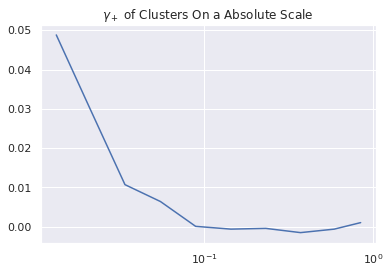

Aggregated xi:
[-73.0937 -93.1676 -52.732  -51.8436  -1.1475  13.3861  13.8363  62.5914
  25.0692 -10.5909]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -6477.6665 -12033.1955 -16694.5175 -23510.3034 -32329.5884 -41808.4271
 -46349.4061 -40976.7035 -21163.8956  -1719.5575]
------------------------------------------------------------------------------
Aggregated npairs:
[ 1498.  3117.  4930.  8102. 13351. 21547. 31680. 41424. 39996. 10239.]
------------------------------------------------------------------------------
Mean xi:
[-4.8794e-02 -2.9890e-02 -1.0696e-02 -6.3989e-03 -8.5947e-05  6.2125e-04
  4.3675e-04  1.5110e-03  6.2679e-04 -1.0344e-03]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3242 -3.8605 -3.3863 -2.9018 -2.4215 -1.9403 -1.463  -0.9892 -0.5292
 -0.1679]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

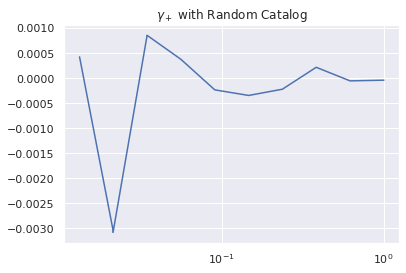

[ 4.3030e-04 -3.0562e-03  8.6036e-04  3.8116e-04 -2.2971e-04 -3.4155e-04
 -2.1683e-04  2.2134e-04 -5.0238e-05 -3.6069e-05]
[-3.9398e-06  2.7982e-05 -7.8774e-06 -3.4898e-06  2.1032e-06  3.1271e-06
  1.9852e-06 -2.0265e-06  4.5997e-07  3.3025e-07]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

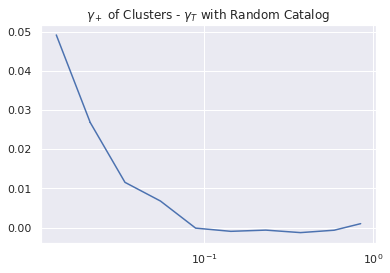

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

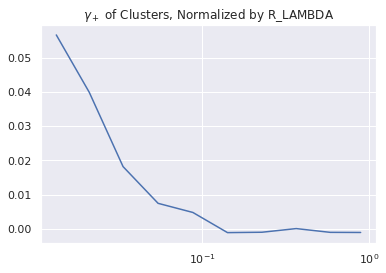

Aggregated xi:
[-46.2363 -90.6857 -71.7247 -47.0306 -49.0728  18.8682  26.3325  -2.167
  45.7     30.6568]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -3519.3394  -8769.792  -13384.7841 -18378.3184 -24961.4007 -32954.0446
 -38588.52   -37138.2007 -23487.4273  -3280.1978]
------------------------------------------------------------------------------
Aggregated npairs:
[  816.  2273.  3946.  6318. 10276. 16888. 26131. 36988. 43936. 28575.]
------------------------------------------------------------------------------
Mean xi:
[-5.6662e-02 -3.9897e-02 -1.8177e-02 -7.4439e-03 -4.7755e-03  1.1173e-03
  1.0077e-03 -5.8587e-05  1.0401e-03  1.0729e-03]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3129 -3.8582 -3.392  -2.9089 -2.4291 -1.9513 -1.4767 -1.0041 -0.5346
 -0.1148]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)